# Topics
## 1. Matrix Manipulation in Python
## 2. Relaxation Method and the Laplace Equation.


## 1. Matrix Manipulation in Python

In [ ]:
'''Important:

For most purposes, 

M = np.matrix([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])

and

M = np.array([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])

give you the same thing.  But certain matrix methods don't apply to a numpy array 
(such as the inverse; note: .I and .getI() both give you the inverse.).

For the whole list of methods:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html

or do 

>>> dir(M)

'''

import numpy as np
M1 = np.matrix([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])

M2 = np.matrix([[10., 1., 2.],
              [1., 1., 4.3],
              [2., -1., 10.]])

a = np.array([1., 2., 3.])
b = np.array([1., 1/2., 1/3.])

M_sum = A + B
print 'M_sum', M_sum

# np.dot
# for 1D -- dot product
dot_product = np.dot(a, b)
print 'dot_product:', dot_product



In [ ]:
# Note: attributes are listed first, before the dunder (special) methods.
print dir(M1)

In [ ]:
# for 2D -- matrix multiplication
M_multip = np.dot(M1, M2)
print 'M_multip:'
print M_multip

# another example of matrix multiplication
M1_op_a = np.dot(M1, a)
print 'M1_op_a:'
print M1_op_a

# transpose
M1_T = M1.T
print 'Transposed M1:'
print M1_T

# trace
print 'M1_trace', M1.trace()

# inverse
print 'M1_inverse:' 
print M1.I
print '...to verify (M1*M1_inverse):'
# Note: for most python operations, the numerical error is on the level of 1e-16.
print np.dot(M1.I, M1)

In [ ]:
# To get the determinant
import numpy.linalg as LA
import numpy as np
M1 = np.matrix([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])
print "Determinant of M1", LA.det(M1)

## Quick Breakout

### Write a function, solve_eqn() that solves the following matrix equations.  You should catch the expected exception of a non-invertible matrix.

### Mx = b

### A) 
M1 = np.matrix([[1., 1.5, 3.],[-1., 11., -1.],[0., -1., 10.]]) and b = np.array([1., 1/2., 1/3.])

### B) 
M2 = np.matrix([[1.,0., 0.],[-2., 0., 0.],[4., 6., 1.]]) and c = np.array([1., 2., 3.])

### C) 
M3 = np.matrix([[1., 1.5, 3.],[-1., 11., -1.],[0., -1., 10.]]) and d = np.array([1., 2., 3.])

In [ ]:
M1 = np.matrix([[1., 1.5, 3.],[-1., 10., -1.],[0., -1., 10.]]) 
b = np.array([1., 1/2., 1/3.])
soln = solve_eqn(M1, b)
print 'Solution:', soln

In [ ]:
M2 = np.matrix([[1.,0., 0.],[-2., 0., 0.],[4., 6., 1.]]) 
c = np.array([1., 2., 3.])
soln = solve_eqn(M2, c)
print 'Solution:', soln

In [ ]:
M3 = np.matrix([[-3. , -5., 1.], [9. ,14., 1.],  [18., 29., -2.]])
d = np.array([3., 2., 1.])
soln = solve_eqn(M3, d)
print 'Solution:', soln
# print M2.I
# print LA.det(M2)

## 2. Relaxation Method and the Laplace Equation.


### The name, "Relaxation Method":

### For example, for the diffusion equation, an initial temperature distribution u(x, t) "relaxes" to an equilibrium solution as t -> inf.

(See Numerical Recipes 3rd. Ed. p. 1059)

## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

In [ ]:
'''

The Jacobi Method: The matrix approach.

This cell is copied verbatim from last class (wk7-2)

'''


import numpy as np

max_iter = 100

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

D = np.diag(A)
print "The diagonal elements:\n", D
print "The diagonal matrix:\n", np.diagflat(D)
R = A - np.diagflat(D)
print "The remainder matrix:\n", R

# initialize the RHS vector
b = np.array([6., 25., -11., 15.])


# prints the linear system
print("System of Linear Equations:")
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print " + ".join(row) + "=" + str(b[i])
print '\n\n'

# Initial Guess: Usually you would want an "educated" guess, 
# typcially x_guess = D^(-1)b. 
# But because the method is so robust, it hardly matters...
# We will try all 0's and a set of random numbers.
x = np.zeros(b.shape)
#x = np.random.rand(b.shape[0])
# specify tolerance
tol = 1e-4

counter = 0
print 'Starting Jacobi method iterations...'
while counter < max_iter:
    print "Iteration {:d}:{}".format(counter, x)
    # Just to create a numpy array that has the same dimension as x.
    x_new = np.empty(x.shape)

    for i in range(A.shape[0]):
        # np.dot computes dot product
        
        s = np.dot(R[i,], x)
        x_new[i] = (b[i] - s) / A[i, i]
            
    counter += 1      
    # Returns True if two arrays are element-wise equal within a tolerance.
    if np.allclose(x, x_new, rtol=tol):
        print 'Tolerance achieved.  Printing results...'
        break      
    else:
        if counter == max_iter:
            raise Exception('max_iter exceeded!')

    x = x_new

print '\n\n'
print "Solution:", x 
print "Estimated Error:", (np.dot(A, x) - b)/b 

## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

[ 0.          0.09999645  0.19999358  0.2999916   0.39999061  0.49999061
  0.5999915   0.69999313  0.79999525  0.89999763  1.        ]


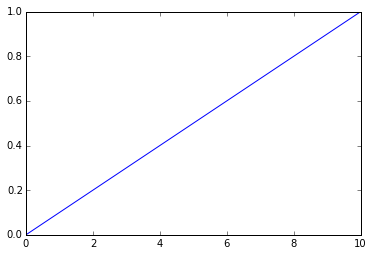

In [1]:
%matplotlib inline
'''

Jacobi Method: the for-loop approach -- 1D example.

Note how the initial guess of all zeros over a number of iterations "relaxes" to the final solution -- not unlike
an initial temperature distribution relaxes to the steady-state distribution (solution).

'''



import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)


#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    diff = 0.         #crucial!!
    # start from 1 and end at NX-2: because you don't want to change the BC!!
    for i in range(1, NX-1):    
        newV = (V[i-1]+V[i+1])/2
        prev_diff = abs(newV - V[i])
        # to find the maximum difference in each loop (going over all interior points).
        V[i] = newV
        if diff < prev_diff:    
            diff = prev_diff

print V
plt.plot(x, V)
plt.show()
          

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

## Breakout Problem:
### For a long rectangular tube, the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube.   Start with (2x2) interior grid points.
### Then plot the result as a surface plot.

## Connection between the "2-for-loop" way and the matrix way -- go to slides.

## Breakout Problem:

### Write a function, jacobi_meth() that takes two positional argument A and b.  It should also take max_iter, tol, and x_guess as keyword argument.  Set the default values as such: max_iter = 100, tol = 1e-6, and the default value of x_guess should be a zero vector.   Finally inside each iteration, no loops allowed.

### Apply this function to the Laplace Equation problem.

### Using the answer we obtained before (for the system of algebraic equations) as the doctest.

## Breakout Solution: See jacobi_meth.py

## End of week 8-1

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm #color map

# I can use random numbers to initialize the interior points.
from numpy.random import rand
import matplotlib.pyplot as plt

NX = 10
NY = 10

#initialization
V = rand(NX,NY)

print V

#Boundary Conditions:
V[0,:] = 1.
V[NY-1,:] = 1.
V[:,0] = 0
V[:,NX-1] = 0

print V
maxdiff = 1e-6
diff = 1
x = np.arange(NX)
y = np.arange(NY)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        for j in range(1, NY-1):
            newV = (V[i, j+1]+V[i, j-1]+V[i+1,j]+V[i-1, j])/4
            diff = abs(newV - V[i,j])
            V[i,j] = newV

  
            
#print V
#plt.plot(x, V)

fig = plt.figure(figsize= (15,10))
ax = fig.add_subplot(111, projection='3d')
#plt.title("Wave Function")
#plt.suptitle("Antisymmetric Spatial Wave Function")
#x1 = x2 = np.linspace(-1,1,50)
xv, yv  = np.meshgrid(x,y)
#z = antisym(xv,yv) #args.
ax.plot_surface(xv,yv,V, rstride = 1, cstride = 1, cmap=cm.coolwarm, linewidth = 0.2)

plt.show()

# A very robust method!

[[  2.87639902e-02   6.34612909e-01   1.19815605e-02   3.15107953e-01
    8.85907396e-01   6.67582646e-01   1.40717335e-01   6.86336070e-01
    8.45079088e-01   8.65586085e-01]
 [  7.94204088e-01   4.42464573e-01   3.72767614e-01   2.13944630e-01
    7.92396604e-01   3.44882719e-01   9.96971543e-01   8.64551432e-01
    6.20973226e-04   2.02649529e-01]
 [  1.08313600e-01   1.56961877e-02   3.16771679e-01   2.96963890e-02
    1.19905429e-01   6.04781762e-01   3.81035599e-01   7.67166089e-01
    6.68030278e-01   7.19220170e-01]
 [  8.62757714e-01   1.04018068e-01   9.68865705e-01   6.74241160e-01
    4.22002427e-01   5.62007114e-01   6.17875830e-01   9.71070409e-01
    9.08235745e-01   5.85252666e-01]
 [  7.85880816e-01   1.25429323e-01   1.39099269e-01   7.81306129e-01
    5.58433335e-01   9.59106405e-01   4.98344556e-01   7.01387853e-01
    6.21870783e-02   1.48427793e-01]
 [  2.60783278e-01   1.85252549e-01   5.49660961e-01   2.53678140e-02
    7.02255155e-02   9.66696144e-01   1.09648